In [1]:
import pandas as pd
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


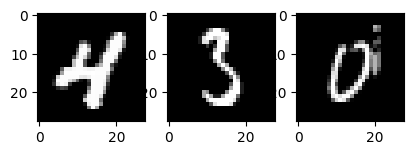

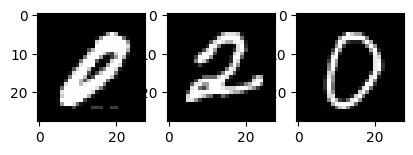

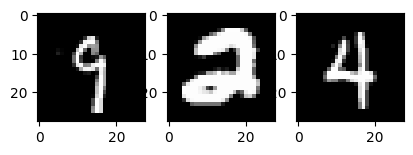

In [2]:
import matplotlib.pyplot as plt
import random

for i in range(1,4,1):
    for j in range(1,4,1):
        plt.subplot(i,4,j)
        plt.imshow(x_train[random.randint(0,60000)],cmap="gray")
    plt.show()


In [3]:
x_train_new = x_train.reshape(-1, 784)
x_test_new = x_test.reshape(-1, 784)

x_train_ = x_train_new / 255.0
x_test_ = x_test_new / 255.0

In [4]:
x_train_new.shape, x_test_new.shape

((60000, 784), (10000, 784))

In [5]:
from keras.utils import to_categorical

In [6]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [7]:
y_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

In [9]:
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 576810 (2.20 MB)
Trainable params: 576810 

In [11]:
model.fit(x_train_, y_train_new, validation_data=(x_test_, y_test_new), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2251 - accuracy: 0.9327 - val_loss: 0.1013 - val_accuracy: 0.9669
Epoch 2/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1000 - accuracy: 0.9710 - val_loss: 0.0963 - val_accuracy: 0.9719
Epoch 3/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0729 - accuracy: 0.9784 - val_loss: 0.0973 - val_accuracy: 0.9725
Epoch 4/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0578 - accuracy: 0.9832 - val_loss: 0.0829 - val_accuracy: 0.9776
Epoch 5/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.0858 - val_accuracy: 0.9762
Epoch 6/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0396 - accuracy: 0.9887 - val_loss: 0.0838 - val_accuracy: 0.9773
Epoch 7/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0334 - accuracy: 0.9900 - val_loss: 0.0924 - val_

In [12]:
y_pred = model.predict(x_test_)
y_pred

313/313 [==============================] - 1s 4ms/step


array([[3.2485041e-09, 6.4491378e-11, 3.3290688e-09, ..., 9.9999946e-01,
        1.9306737e-11, 4.8119517e-07],
       [3.5964336e-20, 1.1757655e-28, 9.9999994e-01, ..., 3.0900892e-31,
        9.8184695e-19, 3.9418869e-35],
       [7.7429565e-37, 9.9999994e-01, 1.3697438e-17, ..., 7.7148608e-14,
        1.1903860e-16, 1.6508277e-17],
       ...,
       [1.7779446e-15, 5.0283595e-13, 2.5846577e-13, ..., 3.8062852e-16,
        1.7600948e-16, 2.3600739e-07],
       [6.3858083e-34, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.9630755e-27, 3.0696033e-36],
       [1.0338333e-19, 4.3770811e-17, 3.2154110e-19, ..., 0.0000000e+00,
        4.0600423e-19, 9.2028186e-36]], dtype=float32)

In [13]:
import numpy as np

In [14]:
t = []

for i in range(len(y_pred)):
    t.append(np.argmax(y_pred[i]))

t

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 3,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [15]:
accuracy_score(y_test, t)

0.9831